In [ ]:
import numpy as np
import seaborn as sns

## Monthly video count plots for each search query

/tmp/ipykernel_2461699/1649593111.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"] = df["published_at"].dt.to_period("M")


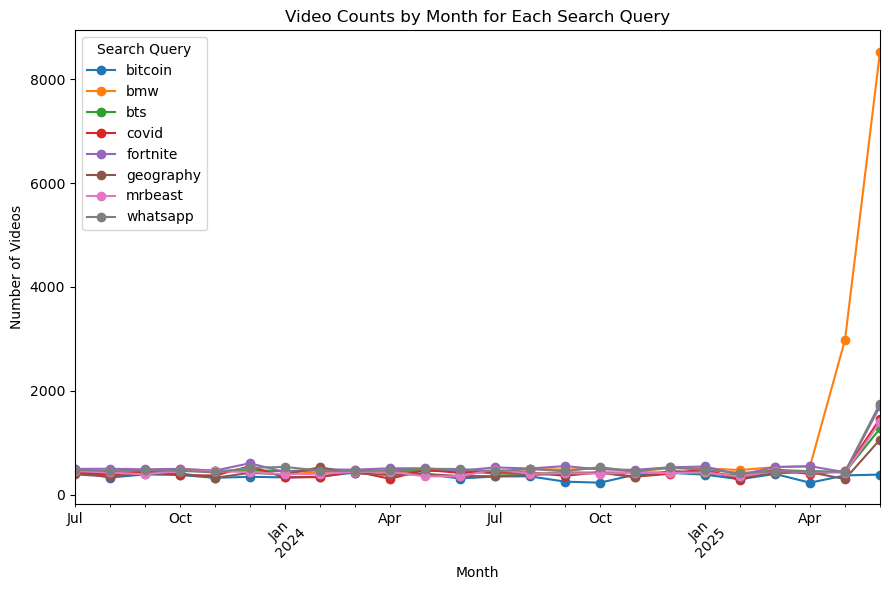

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Load data from your SQLite DB
db_path = "/netfiles/compethicslab/hashtag-hijacking/youtube.db"
conn = sqlite3.connect(db_path)
df = pd.read_sql("SELECT * FROM youtube_videos", conn)

conn.close()

df["published_at"] = pd.to_datetime(df["published_at"], errors="raise")

df["year_month"] = df["published_at"].dt.to_period("M")

video_counts = (
    df.groupby(["search_query", "year_month"])
    .size()
    .reset_index(name="video_count")
)

pivot_counts = video_counts.pivot(index="year_month", columns="search_query", values="video_count").fillna(0)

# Plot
pivot_counts.plot(kind="line", marker="o", figsize=(9,6))
plt.title("Video Counts by Month for Each Search Query")
plt.xlabel("Month")
plt.ylabel("Number of Videos")
plt.legend(title="Search Query")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


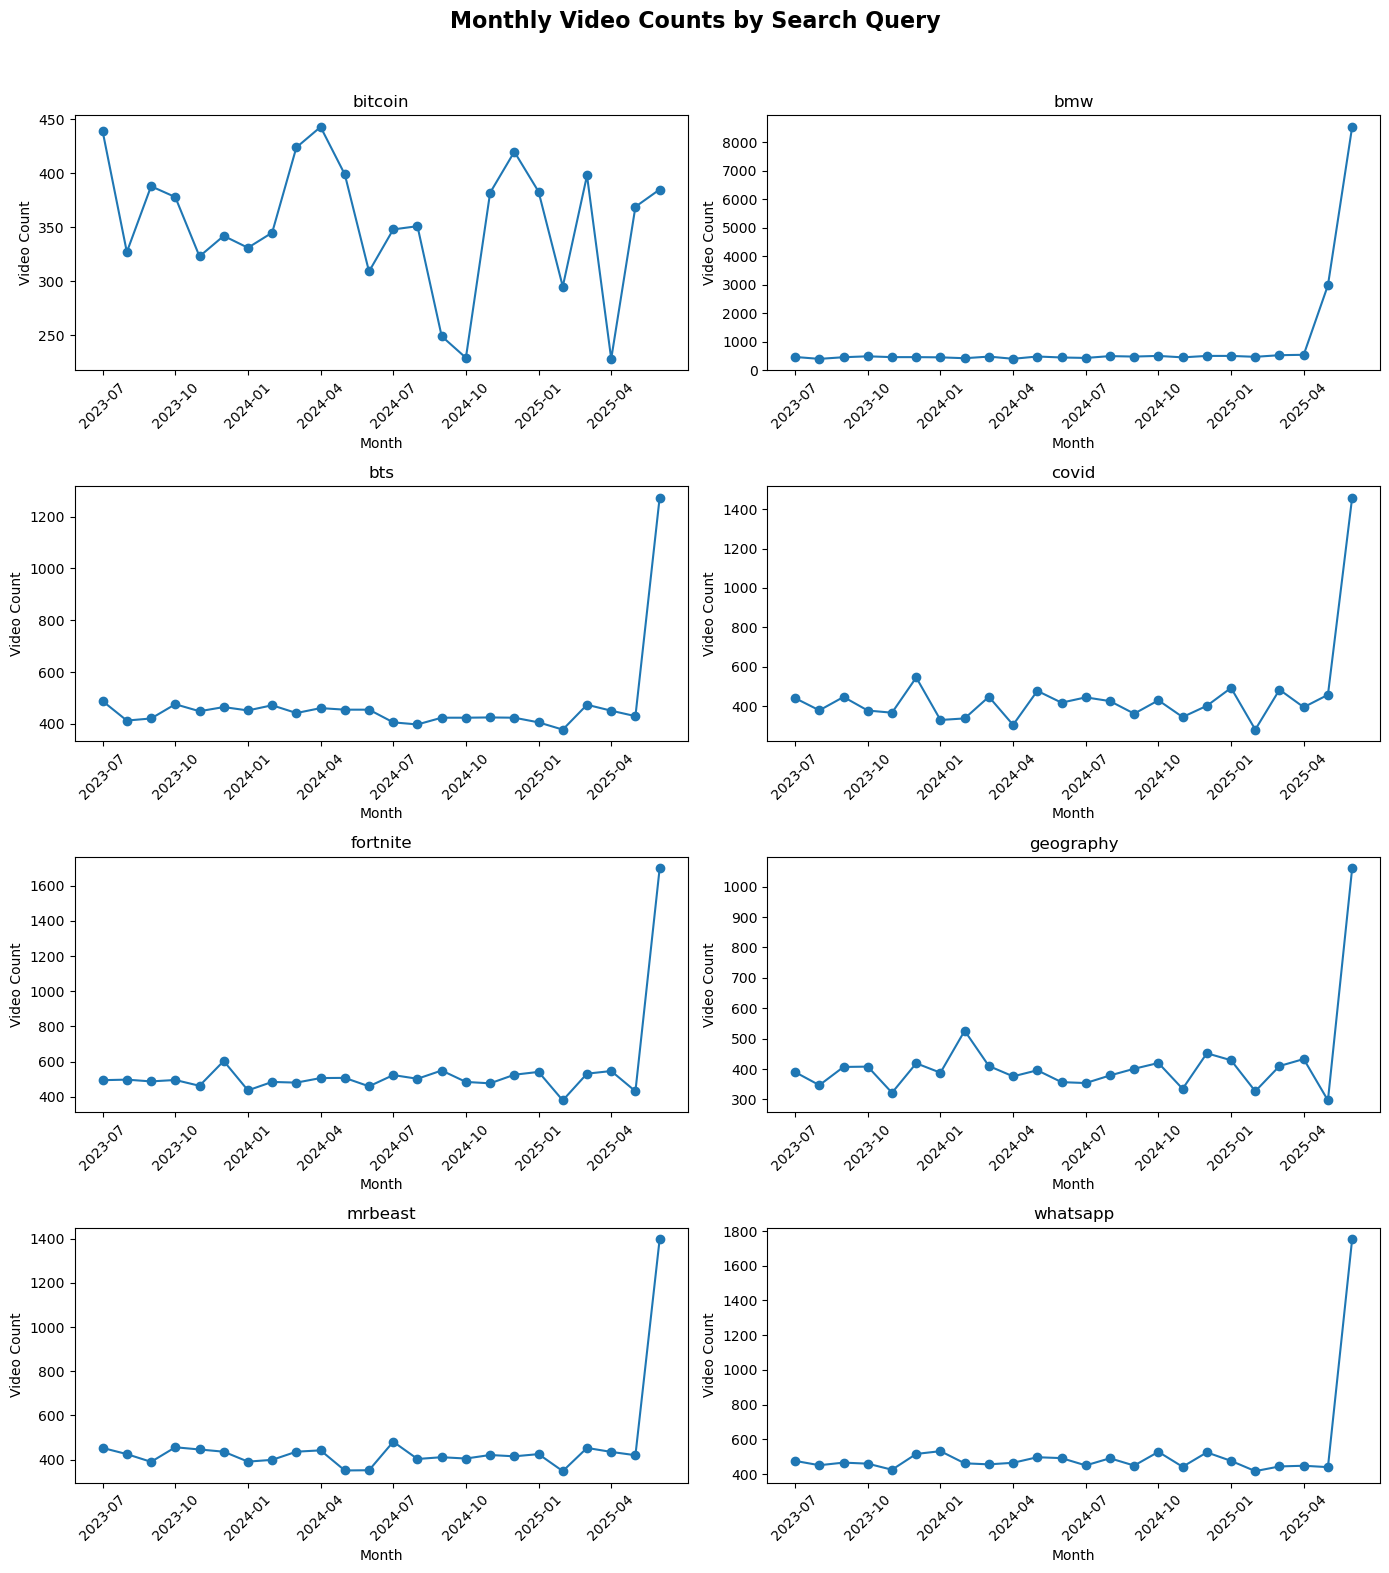

In [4]:
queries = video_counts["search_query"].unique()

rows = (len(queries) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 4))
axes = axes.flatten()

for i, query in enumerate(queries):
    ax = axes[i]
    subset = video_counts[video_counts["search_query"] == query]
    
    ax.plot(
        subset["year_month"].astype(str),
        subset["video_count"],
        marker="o",
        linestyle="-"
    )
    
    ax.set_title(query, fontsize=12)
    ax.set_xlabel("Month")
    ax.set_ylabel("Video Count")
    ax.set_xticks(ax.get_xticks()[::3])
    ax.tick_params(axis="x", rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Monthly Video Counts by Search Query", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [25]:
total_videos = df['video_id'].nunique()
print(f"Total unique videos: {total_videos}")
print(f"Total video entries (including duplicates): {len(df)}")

Total unique videos: 99006
Total video entries (including duplicates): 99230


## Total video counts for each search query

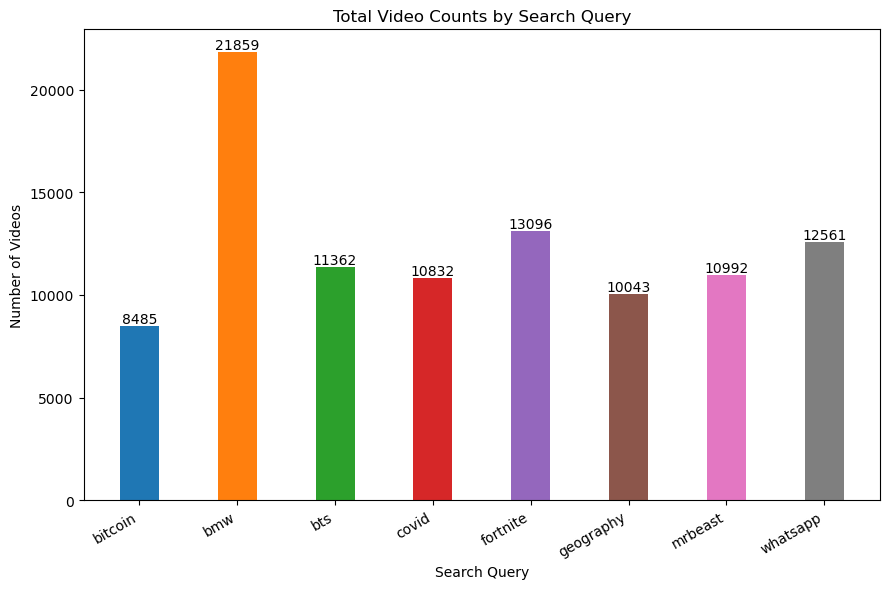

In [3]:
query_counts = df.groupby("search_query").size().reset_index(name="video_count")

plt.figure(figsize=(9,6))
colors = plt.cm.tab10(np.arange(len(query_counts)))

bars = plt.bar(query_counts["search_query"], query_counts["video_count"], color=colors, width=0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(height),
        ha="center", va="bottom", fontsize=10
    )

plt.title("Total Video Counts by Search Query")
plt.xlabel("Search Query")
plt.ylabel("Number of Videos")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

## Category distribution for each search query (video count and percentages)

In [5]:
df['category_id'] = df['category_id'].fillna("").astype(str)
category_mapping = {
    "1": "Film & Animation",
    "2": "Autos & Vehicles",
    "10": "Music",
    "15": "Pets & Animals",
    "17": "Sports",
    "18": "Short Movies",
    "19": "Travel & Events",
    "20": "Gaming",
    "21": "Videoblogging",
    "22": "People & Blogs",
    "23": "Comedy",
    "24": "Entertainment",
    "25": "News & Politics",
    "26": "Howto & Style",
    "27": "Education",
    "28": "Science & Technology",
    "29": "Nonprofits & Activism",
    "30": "Movies",
    "31": "Anime/Animation",
    "32": "Action/Adventure",
    "33": "Classics",
    "34": "Comedy",
    "35": "Documentary",
    "36": "Drama",
    "37": "Family",
    "38": "Foreign",
    "39": "Horror",
    "40": "Sci-Fi/Fantasy",
    "41": "Thriller",
    "42": "Shorts",
    "43": "Shows",
    "44": "Trailers"
}

df['category_name'] = df['category_id'].map(category_mapping).fillna("Unknown")
category_tables = {}

for query in df['search_query'].unique():
    subset = df[df['search_query'] == query]
    counts = subset['category_name'].value_counts().reset_index()
    counts.columns = ['Category', 'Video Count']
    counts['Percentage'] = (counts['Video Count'] / counts['Video Count'].sum() * 100).round(2)
    category_tables[query] = counts

for query, table in category_tables.items():
    print(f"\n=== Category Distribution for Query: {query} ===")
    print(table.to_string(index=False))


=== Category Distribution for Query: bmw ===
             Category  Video Count  Percentage
     Autos & Vehicles        11714       53.59
       People & Blogs         6638       30.37
        Entertainment         1081        4.95
               Gaming          995        4.55
                Music          266        1.22
            Education          253        1.16
               Sports          171        0.78
 Science & Technology          140        0.64
      Travel & Events          139        0.64
        Howto & Style          120        0.55
     Film & Animation          119        0.54
      News & Politics          108        0.49
               Comedy           99        0.45
       Pets & Animals           13        0.06
Nonprofits & Activism            3        0.01

=== Category Distribution for Query: mrbeast ===
             Category  Video Count  Percentage
        Entertainment         3865       35.16
       People & Blogs         3499       31.83
           

In [6]:
counts = df.groupby(['search_query', 'category_name']).size().reset_index(name='Video Count')
counts['Percentage'] = counts.groupby('search_query')['Video Count'].transform(lambda x: round(x / x.sum() * 100, 2))
table = counts.pivot(index='search_query', columns='category_name', values='Percentage').fillna(0)
table = table.reindex(sorted(table.columns), axis=1)
print(table)

category_name  Autos & Vehicles  Comedy  Education  Entertainment  \
search_query                                                        
bitcoin                    0.12    0.45      32.98          13.31   
bmw                       53.59    0.45       1.16           4.95   
bts                        0.28    2.11       1.04          35.91   
covid                      0.27    2.45      11.86           9.78   
fortnite                   0.02    0.40       0.12           4.15   
geography                  0.14    0.72      41.01          12.43   
mrbeast                    0.37    2.72       4.99          35.16   
whatsapp                   0.21    2.56       7.56           8.94   

category_name  Film & Animation  Gaming  Howto & Style  Movies  Music  \
search_query                                                            
bitcoin                    0.26    1.51           3.21    0.09   0.66   
bmw                        0.54    4.55           0.55    0.00   1.22   
bts              

## Engagement plots for each video category

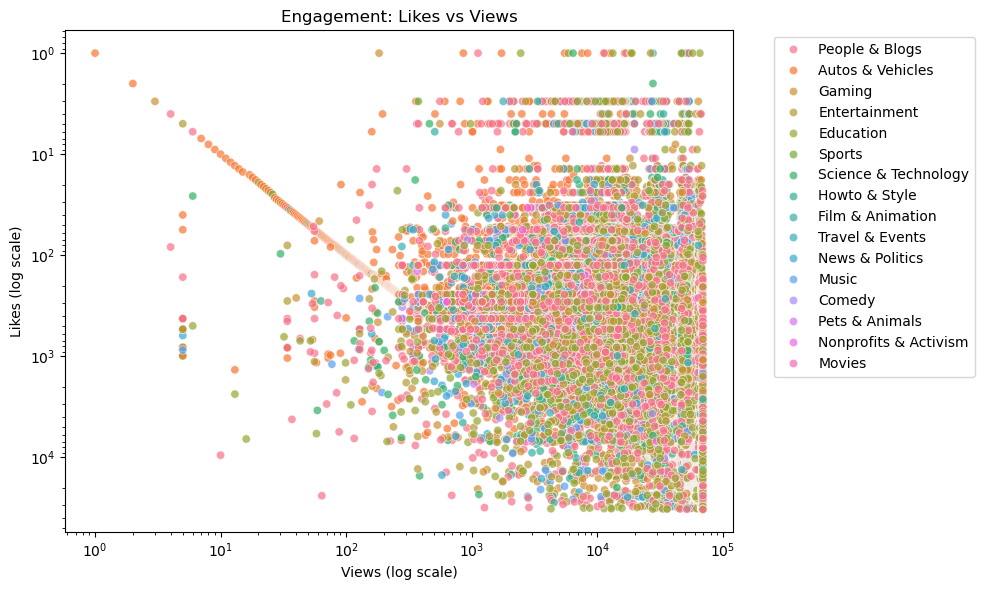

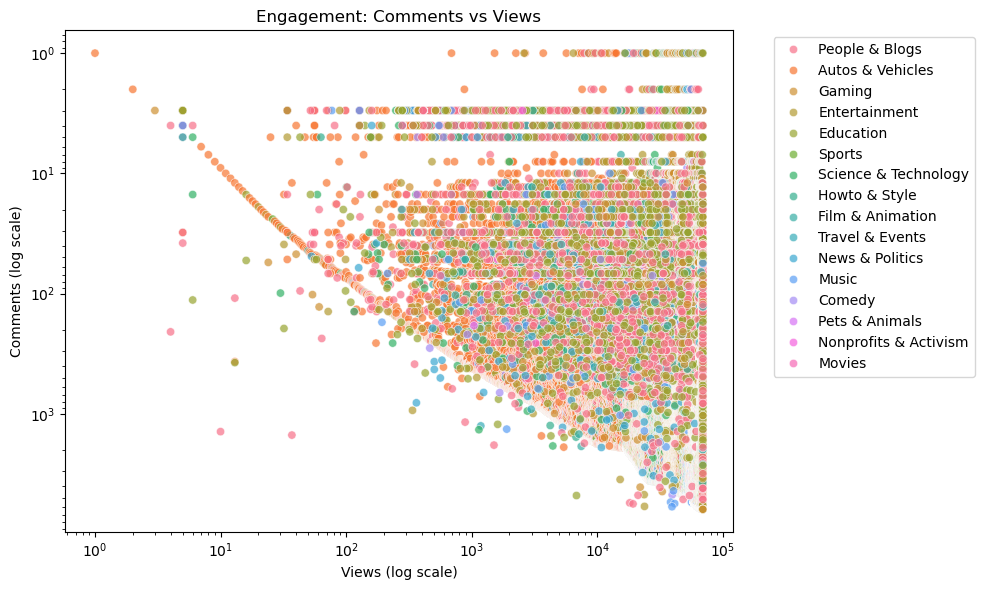

In [ ]:
# Like count vs view count
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='view_count', y='like_count', hue='category_name', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title("Engagement: Likes vs Views")
plt.xlabel("Views (log scale)")
plt.ylabel("Likes (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Comment count vs view count
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='view_count', y='comment_count', hue='category_name', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title("Engagement: Comments vs Views")
plt.xlabel("Views (log scale)")
plt.ylabel("Comments (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

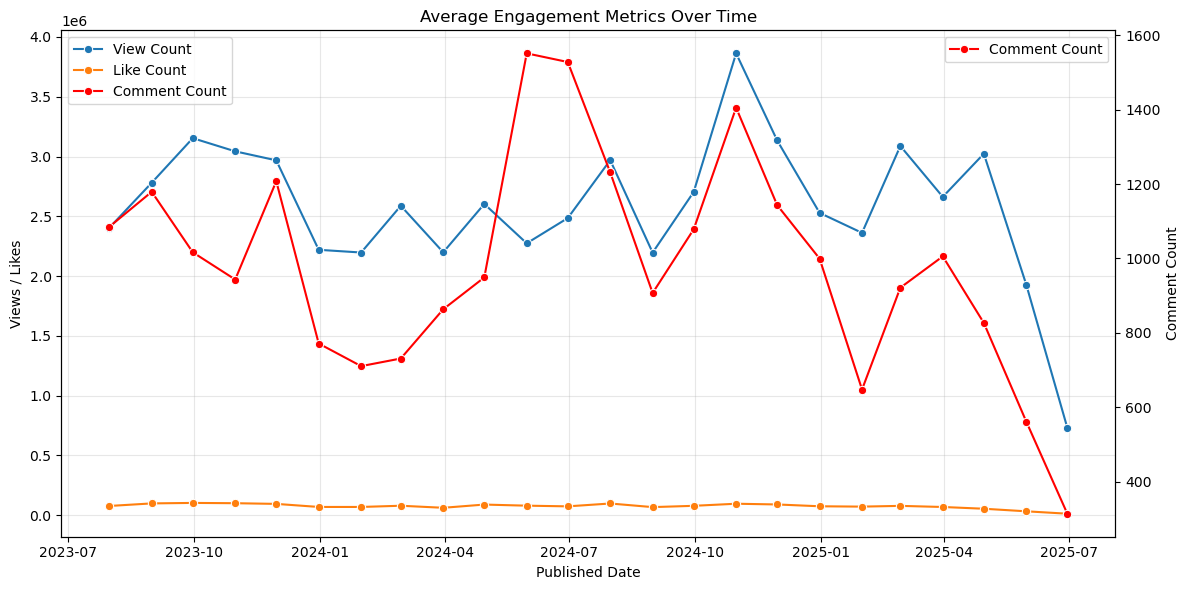

In [36]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data=df_time, x='published_at', y='view_count', marker='o', label='View Count', ax=ax1)
sns.lineplot(data=df_time, x='published_at', y='like_count', marker='o', label='Like Count', ax=ax1)
ax1.set_ylabel("Views / Likes")
ax1.set_xlabel("Published Date")
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
sns.lineplot(data=df_time, x='published_at', y='comment_count', marker='o', color='red', label='Comment Count', ax=ax2)
ax2.set_ylabel("Comment Count")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title("Average Engagement Metrics Over Time")
plt.tight_layout()
plt.show()


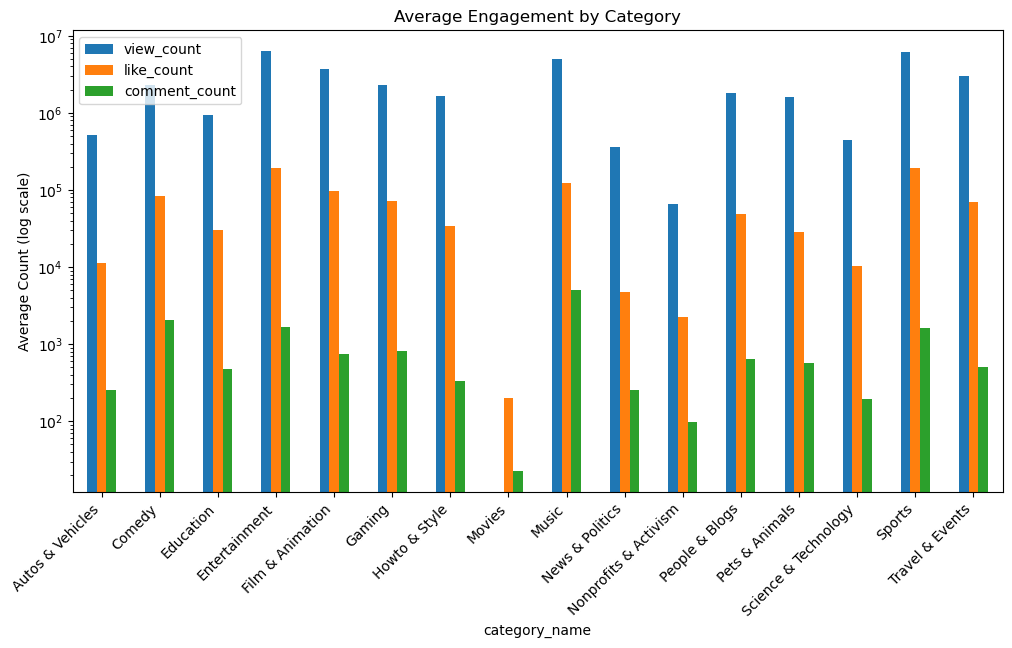

In [24]:
category_avg = df.groupby('category_name')[['view_count','like_count','comment_count']].mean()

category_avg.plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.yscale('log') 
plt.ylabel('Average Count (log scale)')
plt.title('Average Engagement by Category')
plt.show()

## Number of unique videos per category

/tmp/ipykernel_2461699/1160782139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


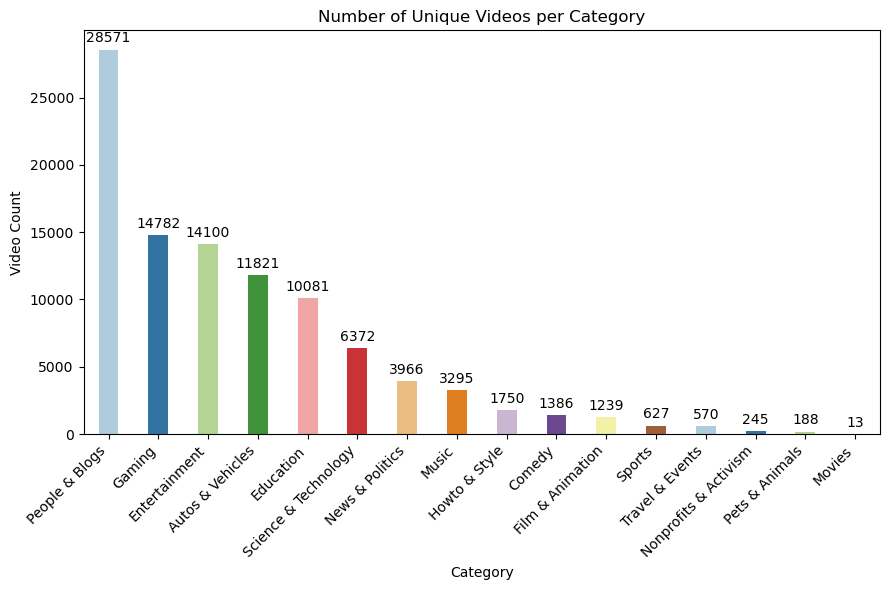

In [35]:
df_count = df.groupby('category_name')['video_id'].nunique().reset_index()
df_count.columns = ['category_name', 'video_count']
df_count = df_count.sort_values('video_count', ascending=False)

plt.figure(figsize=(9,6))
ax = sns.barplot(
    data=df_count,
    x='category_name',
    y='video_count',
    palette=sns.color_palette("Paired", n_colors=len(df_count)),
    width=0.4
)
plt.xticks(rotation=45, ha='right')
plt.title("Number of Unique Videos per Category")
plt.ylabel("Video Count")
plt.xlabel("Category")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10,
                xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [37]:
channel_counts = df.groupby("search_query")["channel_id"].nunique().reset_index()
channel_counts.columns = ["search_query", "unique_channel_count"]

print(channel_counts)

  search_query  unique_channel_count
0      bitcoin                  3577
1          bmw                 11315
2          bts                  5122
3        covid                  8173
4     fortnite                  3527
5    geography                  4099
6      mrbeast                  5842
7     whatsapp                  6324
